# Spare-it Exploratory Data Analysis (EDA)

In [5]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
'''
You will have to star the DS 549 Spare-it directory for below code to run.
Do this by going to shared spark folder and star the file. Then, you should be
able to access from your own drive.
'''
folder_path = '/content/drive/MyDrive/DS 549 Spare-it/Spare-it Images/bu/'

# get all list of files in the path
files = os.listdir(folder_path)
print(f"Total number of files in the directory: {len(files)}")

# print number of json files
json_files = [file for file in files if file.endswith('.json')]
print(f"Number of .json files in the folder: {len(json_files)}")

# print number of image files
image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
image_files = [file for file in files if any(file.endswith(ext) for ext in image_extensions)]
print(f"Number of image files in the folder: {len(image_files)}")

# list out all other files extension
other_files = [file for file in files if file not in json_files + image_files]
print(f"Files not classified as JSON or image files: {other_files}")

Total number of files in the directory: 6253
Number of .json files in the folder: 2024
Number of image files in the folder: 4228
Files not classified as JSON or image files: ['Spare-it Images Data Notes.gdoc']


These JSON files have exactly the same name as one of the image files. As we have 2,024 JSON files with labeling and 4,228 image files, 2,204 images do not have labels. We will primarily use these 2,024 labeled JSON files and images to study our model.

In [7]:
# list of categories
categories = [
  {'id': 1, 'material': 'Complex - Trash', 'name': 'Paper Cup'} ,
  {'id': 2, 'material': 'Complex - Trash', 'name': 'Snack or Candy Bag or Wrapper '} ,
  {'id': 4, 'material': 'Complex - Trash', 'name': 'Wipe'} ,
  {'id': 5, 'material': 'Complex - Trash', 'name': 'Wax Paper'} ,
  {'id': 6, 'material': 'Complex - Trash', 'name': 'Latex Gloves'} ,
  {'id': 7, 'material': 'Complex - Trash', 'name': 'Juice or Other Pouch'} ,
  {'id': 8, 'material': 'Complex - Trash', 'name': 'Diaper'} ,
  {'id': 9, 'material': 'Complex - Trash', 'name': 'Padded Envelope (mixed material))'} ,
  {'id': 10, 'material': 'Complex - Trash', 'name': 'Blister Pack'} ,
  {'id': 11, 'material': 'Complex - Trash', 'name': 'Pens and Pencils'} ,
  {'id': 14, 'material': 'Complex - Trash', 'name': 'Miscellaneous Office Supplies'} ,
  {'id': 15, 'material': 'Complex - Trash', 'name': 'Facemask and Other PPE'} ,
  {'id': 16, 'material': 'Complex - Trash', 'name': 'Shelf Stable Carton'} ,
  {'id': 17, 'material': 'Complex - Trash', 'name': 'Soiled Plastic'} ,
  {'id': 18, 'material': 'Complex - Trash', 'name': 'Soiled Metal'} ,
  {'id': 19, 'material': 'Complex - Trash', 'name': 'Soiled Glass'} ,
  {'id': 115, 'material': 'Complex - Trash', 'name': 'Ceramics'} ,
  {'id': 114, 'material': 'Complex - Trash', 'name': 'Unclassifiable'} ,
  {'id': 116, 'material': 'Complex - Trash', 'name': 'Filled Bag'} ,
  {'id': 117, 'material': 'Complex - Trash', 'name': 'Coffee Pod'} ,
  {'id': 122, 'material': 'Complex - Trash', 'name': 'Other Trash'} ,
  {'id': 123, 'material': 'Complex - Trash', 'name': 'Flexible container lid / seal'} ,
  {'id': 124, 'material': 'Complex - Trash', 'name': 'Snack Food Canister'} ,
  {'id': 127, 'material': 'Complex - Trash', 'name': 'Hard Cover Books'} ,
  {'id': 20, 'material': 'Compostables', 'name': 'Compostable Fiber Ware'} ,
  {'id': 21, 'material': 'Compostables', 'name': 'Compostable Cutlery'} ,
  {'id': 22, 'material': 'Compostables', 'name': 'Compostable Plastic Cups'} ,
  {'id': 23, 'material': 'Compostables', 'name': 'Compostable Paper Cups'} ,
  {'id': 24, 'material': 'Compostables', 'name': 'Paper Towel/Napkins/Tissue'} ,
  {'id': 25, 'material': 'Compostables', 'name': 'Wooden Coffee Stirrer or Chopstick'} ,
  {'id': 26, 'material': 'Compostables', 'name': 'Soiled Cardboard Box'} ,
  {'id': 27, 'material': 'Compostables', 'name': 'Compostable Plastic Lid'} ,
  {'id': 30, 'material': 'Compostables', 'name': 'Food Soiled Paper'} ,
  {'id': 125, 'material': 'Compostables', 'name': 'Other compostable material'} ,
  {'id': 126, 'material': 'Compostables', 'name': 'Sandwich paper wrapper'} ,
  {'id': 36, 'material': 'Complex - Trash', 'name': 'Plastic strapping'} , # json file ordering bit off
  {'id': 38, 'material': 'E-Waste', 'name': 'Batteries'} ,
  {'id': 40, 'material': 'E-Waste', 'name': 'Cables'} ,
  {'id': 43, 'material': 'E-Waste', 'name': 'Computers'} ,
  {'id': 44, 'material': 'E-Waste', 'name': 'Monitors'} ,
  {'id': 45, 'material': 'E-Waste', 'name': 'Toner and Ink Cartridges'} ,
  {'id': 46, 'material': 'E-Waste', 'name': 'Miscellaneous Electronics '} ,
  {'id': 47, 'material': 'E-Waste', 'name': 'LED Lightbulb'} ,
  {'id': 48, 'material': 'Food Waste', 'name': 'Meat and Fish'} ,
  {'id': 49, 'material': 'Food Waste', 'name': 'Bones and Shells'} ,
  {'id': 50, 'material': 'Food Waste', 'name': 'Cheese and Other Fats'} ,
  {'id': 51, 'material': 'Food Waste', 'name': 'Fruits And Veggies'} ,
  {'id': 52, 'material': 'Food Waste', 'name': 'Other Food or Mixed Food'} ,
  {'id': 53, 'material': 'Food Waste', 'name': 'Breads'} ,
  {'id': 54, 'material': 'Food Waste', 'name': 'Grains'} ,
  {'id': 55, 'material': 'Food Waste', 'name': 'Tea Bags'} ,
  {'id': 56, 'material': 'Food Waste', 'name': 'Coffee Grounds'} ,
  {'id': 57, 'material': 'Food Waste', 'name': 'Egg Shell'} ,
  {'id': 58, 'material': 'Glass', 'name': 'Glass Bottles'} ,
  {'id': 59, 'material': 'Glass', 'name': 'Glass Jars'} ,
  {'id': 60, 'material': 'Glass', 'name': 'Broken Glass'} ,
  {'id': 120, 'material': 'Glass', 'name': 'Other Clean Glass'} ,
  {'id': 121, 'material': 'Glass', 'name': 'Drinking glass or glass ovenware'} ,
  {'id': 63, 'material': 'Metal', 'name': 'Metal Can'} ,
  {'id': 65, 'material': 'Metal', 'name': 'Aluminum Foil'} ,
  {'id': 66, 'material': 'Metal', 'name': 'Aluminum Catering Tray'} ,
  {'id': 67, 'material': 'Metal', 'name': 'Other Clean Metal'} ,
  {'id': 68, 'material': 'Metal', 'name': 'Aerosol Can'} ,
  {'id': 69, 'material': 'Metal', 'name': 'Metallic Bottle Cap or Lid'} ,
  {'id': 70, 'material': 'Metal', 'name': 'Metal Strapping'} ,
  {'id': 72, 'material': 'Organic', 'name': 'Liquids'} ,
  {'id': 73, 'material': 'Organic', 'name': 'Leaves, Flowers, Grass Clippings'} ,
  {'id': 76, 'material': 'Paper', 'name': 'Office Paper'} ,
  {'id': 77, 'material': 'Paper', 'name': 'Shredded Paper'} ,
  {'id': 78, 'material': 'Paper', 'name': 'Clean Cardboard'} ,
  {'id': 79, 'material': 'Paper', 'name': 'Refrigerated Beverage Carton'} ,
  {'id': 80, 'material': 'Paper', 'name': 'Magazines Newspaper'} ,
  {'id': 82, 'material': 'Paper', 'name': 'Receipts and Thermal Paper'} ,
  {'id': 83, 'material': 'Paper', 'name': 'Empty Paper Bag'} ,
  {'id': 84, 'material': 'Paper', 'name': 'Cardboard Coffee Cup Sleeve'} ,
  {'id': 85, 'material': 'Paper', 'name': 'Clean Paper Plate'} ,
  {'id': 86, 'material': 'Paper', 'name': 'Colored Memo Note'} ,
  {'id': 87, 'material': 'Paper', 'name': 'Office Folder'} ,
  {'id': 88, 'material': 'Paper', 'name': 'Paper Roll'} ,
  {'id': 118, 'material': 'Paper', 'name': 'Wrapping Paper'} ,
  {'id': 119, 'material': 'Paper', 'name': 'Other Clean Paper'} ,
  {'id': 89, 'material': 'Plastic', 'name': 'Plastic Drink Bottle'} ,
  {'id': 91, 'material': 'Plastic', 'name': 'Plastic Milk Jug or Personal Care Bottle'} ,
  {'id': 92, 'material': 'Plastic', 'name': 'Empty Plastic Bag'} , # clear plastic film???
  {'id': 93, 'material': 'Plastic', 'name': 'Yogurt Tub or Container'} ,
  {'id': 94, 'material': 'Plastic', 'name': 'Expanded Polystyrene (styrofoam)'} ,
  {'id': 95, 'material': 'Plastic', 'name': 'Other Clean Plastics (rigid)'} ,
  {'id': 96, 'material': 'Plastic', 'name': 'Straws'} ,
  {'id': 97, 'material': 'Plastic', 'name': 'Clear Clamshell Container'} ,
  {'id': 98, 'material': 'Plastic', 'name': 'Plastic Cutlery'} ,
  {'id': 99, 'material': 'Plastic', 'name': 'Plastic Lid except black'} ,
  {'id': 100, 'material': 'Plastic', 'name': 'Plastic Coffee Stirrer'} ,
  {'id': 101, 'material': 'Plastic', 'name': 'Clear Plastic Cup'} ,
  {'id': 102, 'material': 'Plastic', 'name': 'Colored Plastic Cup'} ,
  {'id': 103, 'material': 'Plastic', 'name': 'Black Plastic'} ,
  {'id': 106, 'material': 'Plastic', 'name': 'Plastic Wrap'} , # doesn't exist in labelling reference
  {'id': 107, 'material': 'Plastic', 'name': 'Bubble Wrap'} ,
  {'id': 109, 'material': 'U-waste', 'name': 'Incandescent Lightbulbs'} ,
  {'id': 110, 'material': 'U-waste', 'name': 'CFL Lightbulbs'} ,
  {'id': 112, 'material': 'Textiles and Clothes', 'name': 'Textiles and Clothes'}
]

print(f"Number of object categories: {len(categories)}")

Number of object categories: 100


The above categories are extracted from the JSON files, where we got the ID and name. The material data is collected from the 'Spare-it Labeling Reference for 3rd Party' material class. One thing we have noted is a discrepancy in categories between the JSON files and the Airtable from 'Spare-it Labeling Reference for 3rd Party.' Inside the JSON file, the ID 92 "Empty Plastic Bag" seems to be named "Clear Plastic Film." Also, ID 106 "Plastic Wrap" does not exist in Airtable.

We should strive to keep the labeling consistent across all documents to avoid confusion in the future.

In [8]:
# storing counts for each category by name
category_counts = {category['name']: 0 for category in categories}

def update_counts_from_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        for annotation in data['annotations']:
            for category in categories:
                if category['id'] == annotation['category_id']:
                    category_counts[category['name']] += 1
                    break

for file_name in json_files:
    file_path = folder_path + file_name
    update_counts_from_file(file_path)

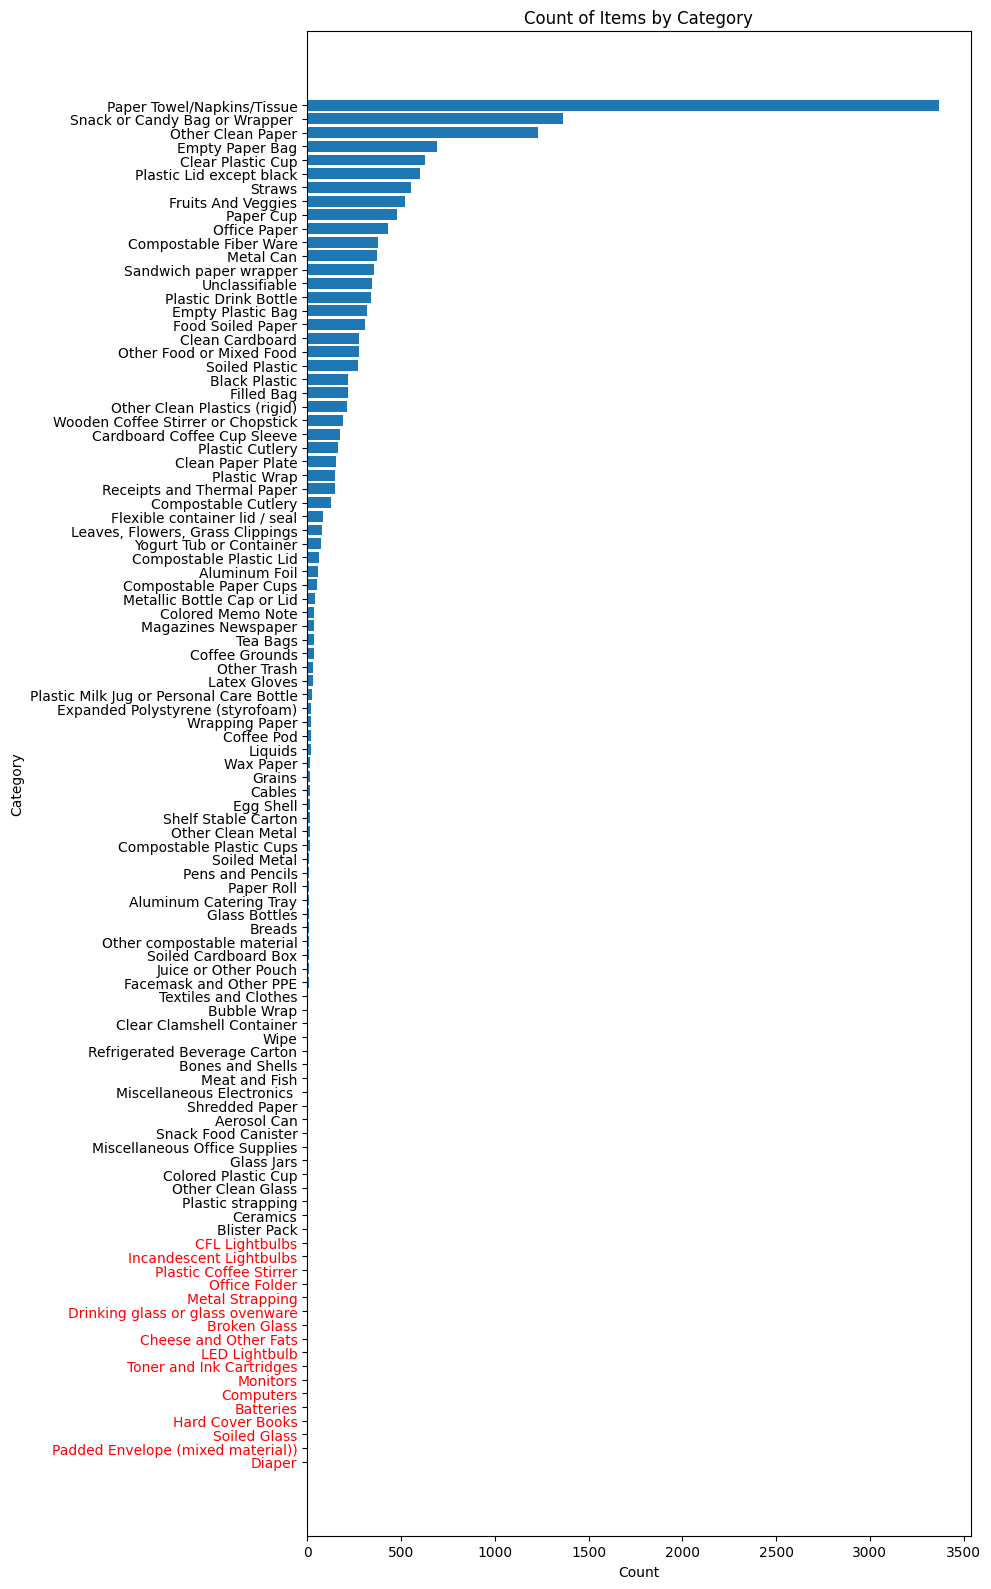

In [9]:
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1])

# split the sorted_categories into two variables
sorted_category_names, sorted_counts = zip(*sorted_categories)

plt.figure(figsize=(10, 16))
bars = plt.barh(sorted_category_names, sorted_counts)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Count of Items by Category')
plt.tight_layout()

# change the color of the y-axis labels to red if the count is 0
for tick_label, count in zip(plt.gca().get_yticklabels(), sorted_counts):
    if count == 0:
        tick_label.set_color('red')

plt.show()

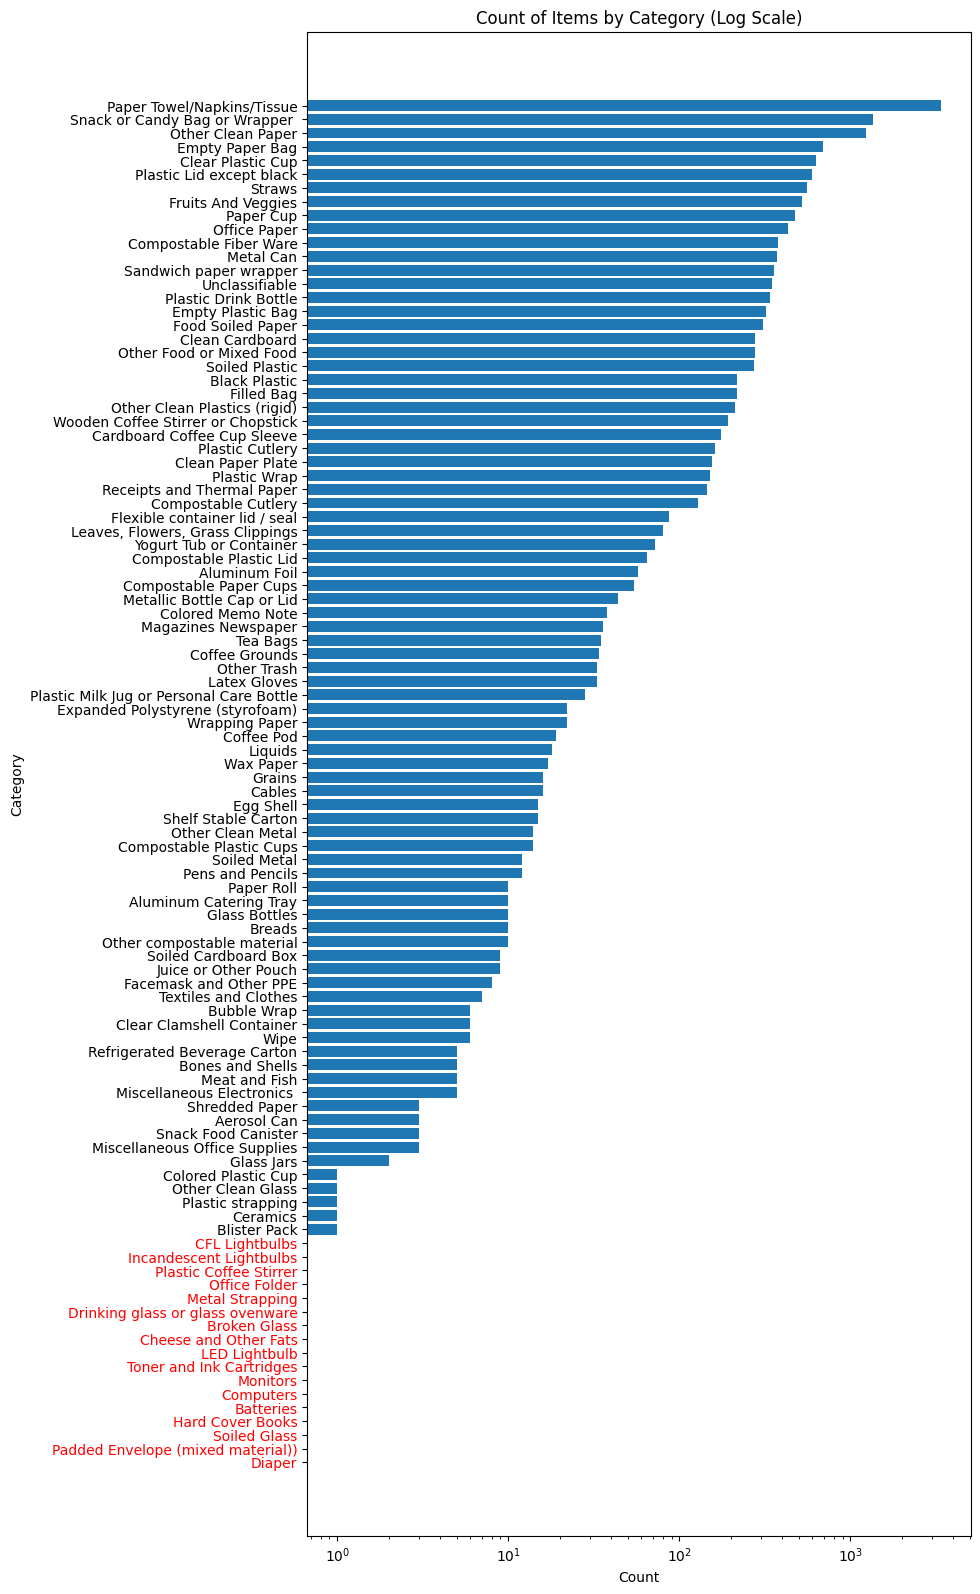

In [10]:
plt.figure(figsize=(10, 16))
bars = plt.barh(sorted_category_names, sorted_counts)

plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Count of Items by Category (Log Scale)')
plt.tight_layout()

plt.xscale('log')

for tick_label, count in zip(plt.gca().get_yticklabels(), sorted_counts):
    if count == 0:
        tick_label.set_color('red')

plt.show()

Here, we have simply drawn out the histograms for each category on the list. We have drawn the graph in log scale to lower the huge gap between some items for the second histogram. Also, we have shown items on the y-axis in red that have 0 occurrences.

The predominance of items such as "Paper Towel/Napkins/Tissue," "Snack or Candy Bag or Wrapper," and "Other Clean Paper" indicates that there is class imbalance in our categories. We can try to overcome this by class weighting, over-sampling, under-sampling, etc. However, for those with 0 occurrences, we can't do much about them.

In [11]:
# display category that is ordered by count
df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
df_sorted = df.sort_values(by='Count', ascending=False)
print(df_sorted.to_string(index=False))

                                Category  Count
              Paper Towel/Napkins/Tissue   3369
          Snack or Candy Bag or Wrapper    1366
                       Other Clean Paper   1231
                         Empty Paper Bag    694
                       Clear Plastic Cup    626
                Plastic Lid except black    599
                                  Straws    555
                      Fruits And Veggies    519
                               Paper Cup    477
                            Office Paper    432
                  Compostable Fiber Ware    376
                               Metal Can    374
                  Sandwich paper wrapper    356
                          Unclassifiable    347
                    Plastic Drink Bottle    340
                       Empty Plastic Bag    321
                       Food Soiled Paper    310
                         Clean Cardboard    278
                Other Food or Mixed Food    277
                          Soiled Plastic

Here is the list of categories in text instead of the graph.

In [12]:
# sort by material type
category_material = {category['name']: category['material'] for category in categories}
material_counts = {}

def update_counts_by_material(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        for annotation in data['annotations']:
            for category in categories:
                if category['id'] == annotation['category_id']:
                    material = category_material[category['name']]
                    if material not in material_counts:
                        material_counts[material] = 0
                    material_counts[material] += 1
                    break

for file_name in json_files:
    file_path = folder_path + file_name
    update_counts_by_material(file_path)

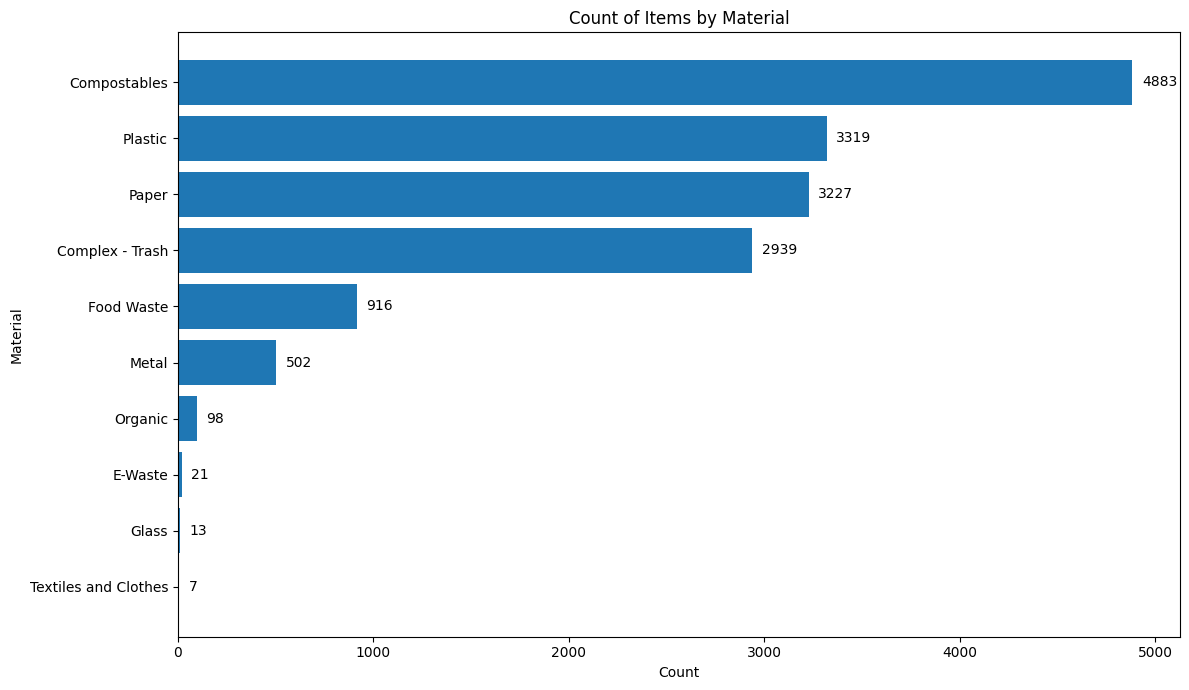

In [13]:
# sort materials by count
sorted_materials = sorted(material_counts.items(), key=lambda x: x[1])
materials, counts = zip(*sorted_materials)  # Unpack the sorted items

# plot
plt.figure(figsize=(12, 7))
bars = plt.barh(materials, counts)
plt.xlabel('Count')
plt.ylabel('Material')
plt.title('Count of Items by Material')
plt.tight_layout()

# annotate each bar with the count value
for bar in bars:
    width = bar.get_width()  # get width of the bar
    label_x_pos = width + max(counts) * 0.01  # position the label slightly right of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), va='center')

plt.show()

This time, we have drawn a histogram from the count of items by material class. We can observe a better balance in these data.

In [ ]:
'''
We will not have sample images shown below. As Spare-it doesn't want the images
to be shared, anyone working on this project should not show the image in public
as it is Spare-it's asset.
'''
from PIL import Image

# make sure to match the json file and image file
# this will work as json files are named same as the image files
json_files.sort()
image_files.sort()

def display_images_with_counts(start_index, end_index):
    for i in range(start_index, end_index):
        image_path = os.path.join(folder_path, image_files[i])
        annotation_path = os.path.join(folder_path, json_files[i])

        # count the category for each image
        category_counts = {category['name']: 0 for category in categories}
        with open(annotation_path, 'r') as file:
            data = json.load(file)
            for annotation in data['annotations']:
                for category in categories:
                    if category['id'] == annotation['category_id']:
                        category_counts[category['name']] += 1
                        break

        # get strings only for categories with higher count than 0
        counts_str = ", ".join([f"{name}: {count}" for name, count in category_counts.items() if count > 0])

        # display the image and count of items
        img = Image.open(image_path)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(counts_str)
        plt.show()

# First 10 images. Alter this to see other images. You can go up to amount of total json files.
display_images_with_counts(0, 10)

Upon examining these with human eyes, we were able to detect the objects. However, one issue we encountered is the 'Unclassifiable' class name. There are images with many 'Unclassifiable' items. Though, determining what is unclassifiable was challenging.

#Summary:

We have drawn two histograms from the 2,024 JSON files we currently have. This number will increase over time as the Spare-it team is working on manually creating these JSON annotations for each individual image.

We will need to create a model that can handle class imbalance, as there are significant differences in occurrence for some of these items. When we displayed the data by material class rather than by name, we saw that there is still class imbalance, but it is slightly less pronounced.